<a href="https://colab.research.google.com/github/amithrx/Live-Pose-estimation-using-Google-Mediapipe-Various-ML-algorithms/blob/main/Pose_estimation_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pose estimation using KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amit.csv to amit.csv


In [ ]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL

dataset = pd.read_csv('amit.csv')

# divide the dataset into class and target variable
# split dataset
X = dataset.iloc[:, 0:117]
y = dataset.iloc[:,117]
print(X)

      nose_x_1  l_shouldr_x_1  r_shoulder_x_1  l_elbow_x_1  r_elbow_x_1  \
0     0.466837       0.536425        0.421737     0.552586     0.400637   
1     0.466981       0.534423        0.419801     0.552579     0.398616   
2     0.443873       0.510529        0.392760     0.538785     0.373896   
3     0.464226       0.529767        0.413536     0.551292     0.381716   
4     0.465310       0.522171        0.403041     0.550459     0.370451   
...        ...            ...             ...          ...          ...   
3807  0.410130       0.470613        0.353162     0.481384     0.346614   
3808  0.413311       0.471635        0.354795     0.481460     0.343648   
3809  0.425184       0.478965        0.361634     0.487567     0.350380   
3810  0.424494       0.479368        0.360942     0.486463     0.352959   
3811  0.415483       0.472030        0.358733     0.484145     0.349483   

      l_wrist_x_1  r_wrist_x_1  l_hip_x_1  r_hip_x_1  l_knee_x_1  ...  \
0        0.554412     0.39

In [ ]:
dataset = pd.read_csv('amit.csv')
print(len(dataset))
print(dataset.head())

3812
   nose_x_1  l_shouldr_x_1  r_shoulder_x_1  l_elbow_x_1  r_elbow_x_1  \
0  0.466837       0.536425        0.421737     0.552586     0.400637   
1  0.466981       0.534423        0.419801     0.552579     0.398616   
2  0.443873       0.510529        0.392760     0.538785     0.373896   
3  0.464226       0.529767        0.413536     0.551292     0.381716   
4  0.465310       0.522171        0.403041     0.550459     0.370451   

   l_wrist_x_1  r_wrist_x_1  l_hip_x_1  r_hip_x_1  l_knee_x_1  ...  \
0     0.554412     0.395508   0.511358   0.443766    0.519801  ...   
1     0.550639     0.395376   0.510005   0.442398    0.518164  ...   
2     0.515840     0.406629   0.494534   0.429211    0.511658  ...   
3     0.495895     0.386194   0.497235   0.429965    0.494289  ...   
4     0.514876     0.409229   0.499619   0.430803    0.508876  ...   

   r_elbow_z_3  l_wrist_z_3  r_wrist_z_3  l_hip_z_3  r_hip_z_3  l_knee_z_3  \
0    -0.233622    -0.306832    -0.442585  -0.004903   0.004764 

Before proceeding further, we need to split the dataset into train and test.

In [ ]:
# split dataset
X = dataset.iloc[:, 0:117]
y = dataset.iloc[:, 117]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33) 
#test_size = 0.2 means, we are keeping 20% of data aside so that we can use it later for testings

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
import math
math.sqrt(len(y_test))

2554
2554
1258
1258


35.4682957019364

In [ ]:
cnt=0
for i in y_test:
  if i==3:
    ++cnt
cnt


0

In [ ]:
type(y_test)
y_test = y_test.to_numpy()
type(y_test)

numpy.ndarray

In [ ]:
y_train

3412    1
1261    0
1620    4
3567    1
2548    3
       ..
1130    0
1294    0
860     0
3507    1
3174    1
Name: output, Length: 2554, dtype: int64

In [ ]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test

array([[-2.72862036, -2.9471408 , -2.05923767, ...,  0.53223861,
        -0.09196647,  0.44974526],
       [ 0.66983359,  1.04690309,  1.09592889, ...,  1.55571405,
        -1.82712178,  1.1543358 ],
       [-0.35235126, -0.50087477, -0.58583618, ...,  0.5562116 ,
        -0.17073955,  0.25694661],
       ...,
       [ 0.35355706,  0.71409125,  0.29694351, ...,  0.34963632,
         1.39976283,  1.40844057],
       [ 0.25983856,  0.85839315,  0.25762069, ...,  0.17195694,
         0.11948706,  2.63646379],
       [-2.20968527, -2.17075305, -2.00792731, ...,  0.43255343,
        -0.16407042, -0.10946926]])

Methods to select value of k based on the erro_rate vs k graph and accuracy_rate vs k graph

Minimum error:- 0.05111402359108781 at K = 17


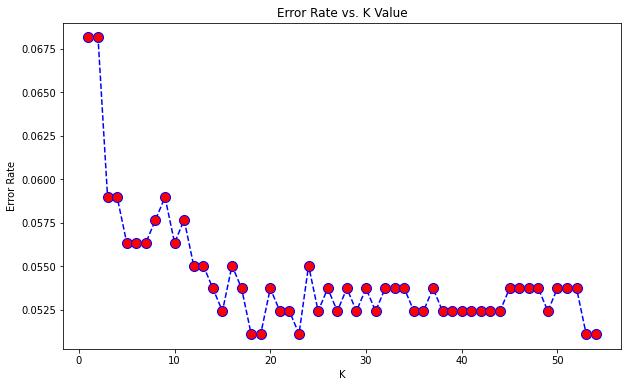

In [ ]:
error_rate = []
for i in range(1,55):
 knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,55),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9488859764089121 at K = 17


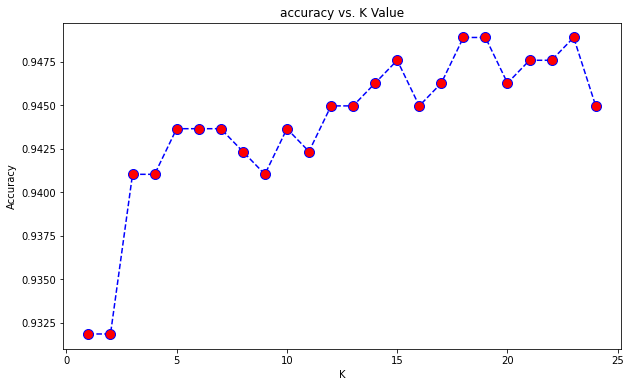

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,25):
    neigh = KNeighborsClassifier(n_neighbors = i,weights='distance').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,25),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=19, p=2,metric='euclidean')

In [ ]:
# Fit Model (Train the models)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [ ]:
# Predict the test set results

y_pred = classifier.predict(X_test)
y_pred

array([3, 3, 0, ..., 2, 2, 3])

In [ ]:
# X_test
y_test

array([3, 3, 0, ..., 2, 2, 3])

In [ ]:
cnt=0
print(len(y_test))
for i in range(len(y_test)):
  if y_test[i]==classifier.predict(X_test)[i]:
    cnt+=1
print(cnt)


1258
1251


[[0.19713831 0.         0.         0.         0.         0.        ]
 [0.00158983 0.20508744 0.         0.         0.         0.        ]
 [0.         0.00079491 0.1645469  0.         0.         0.        ]
 [0.         0.         0.         0.13593005 0.         0.        ]
 [0.         0.         0.         0.         0.24403816 0.        ]
 [0.00317965 0.         0.         0.         0.         0.04769475]]


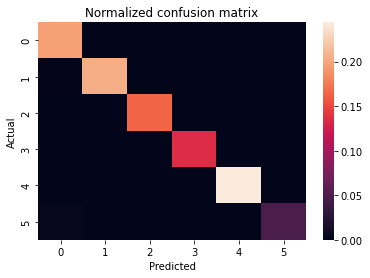

0.994435612082671


In [ ]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred, normalize='all')
print (cm)
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(cm)
plt.title('Normalized confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print(f1_score(y_test, y_pred,average='micro'))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(labels, predictions)
print(conf_mat)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9515072083879423


In [ ]:
y_train_pred = classifier.predict(X_train)

In [ ]:
print(accuracy_score(y_train, y_train_pred))

0.964250573958675
